In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression

In [2]:
%load_ext jupyter_black
plt.style.use("./custom.mplstyle")

In [3]:
df = pd.read_parquet("./electric_prices.parquet")

In [4]:
DAYS_TO_FIT = 15
FIT_DATA = "price"  # Fit on price or rolling24h

# Since the data is collected every 15 minutes, we need to calculate the time to fit.
TIME_TO_FIT = DAYS_TO_FIT * 24 * 4


"""The linear regression model needs an unique index, and it doesn't work well with DateTime.
Therefor we are resetting the index twice to get a column with index values."""

if "time" not in df.columns:
    df = df.reset_index()

if "index" not in df.columns:
    df = df.reset_index()


df_to_fit = df.tail(TIME_TO_FIT)
lr = LinearRegression(fit_intercept=True)

X = df_to_fit[["index"]]
y = df_to_fit[FIT_DATA]

lr.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [5]:
df["pred_price"] = lr.predict(df[["index"]])

In [6]:
pred_df = pd.DataFrame(
    pd.date_range("2022-11-25", "2023-02-28", freq="15min"), columns=["time"]
)
pred_df = pred_df.reset_index()
pred_df["pred_price"] = lr.predict(pred_df[["index"]])

print(f"Coef: {lr.coef_}, Intercept: {lr.intercept_}")

Coef: [-0.08217728], Intercept: 439.8204416822783


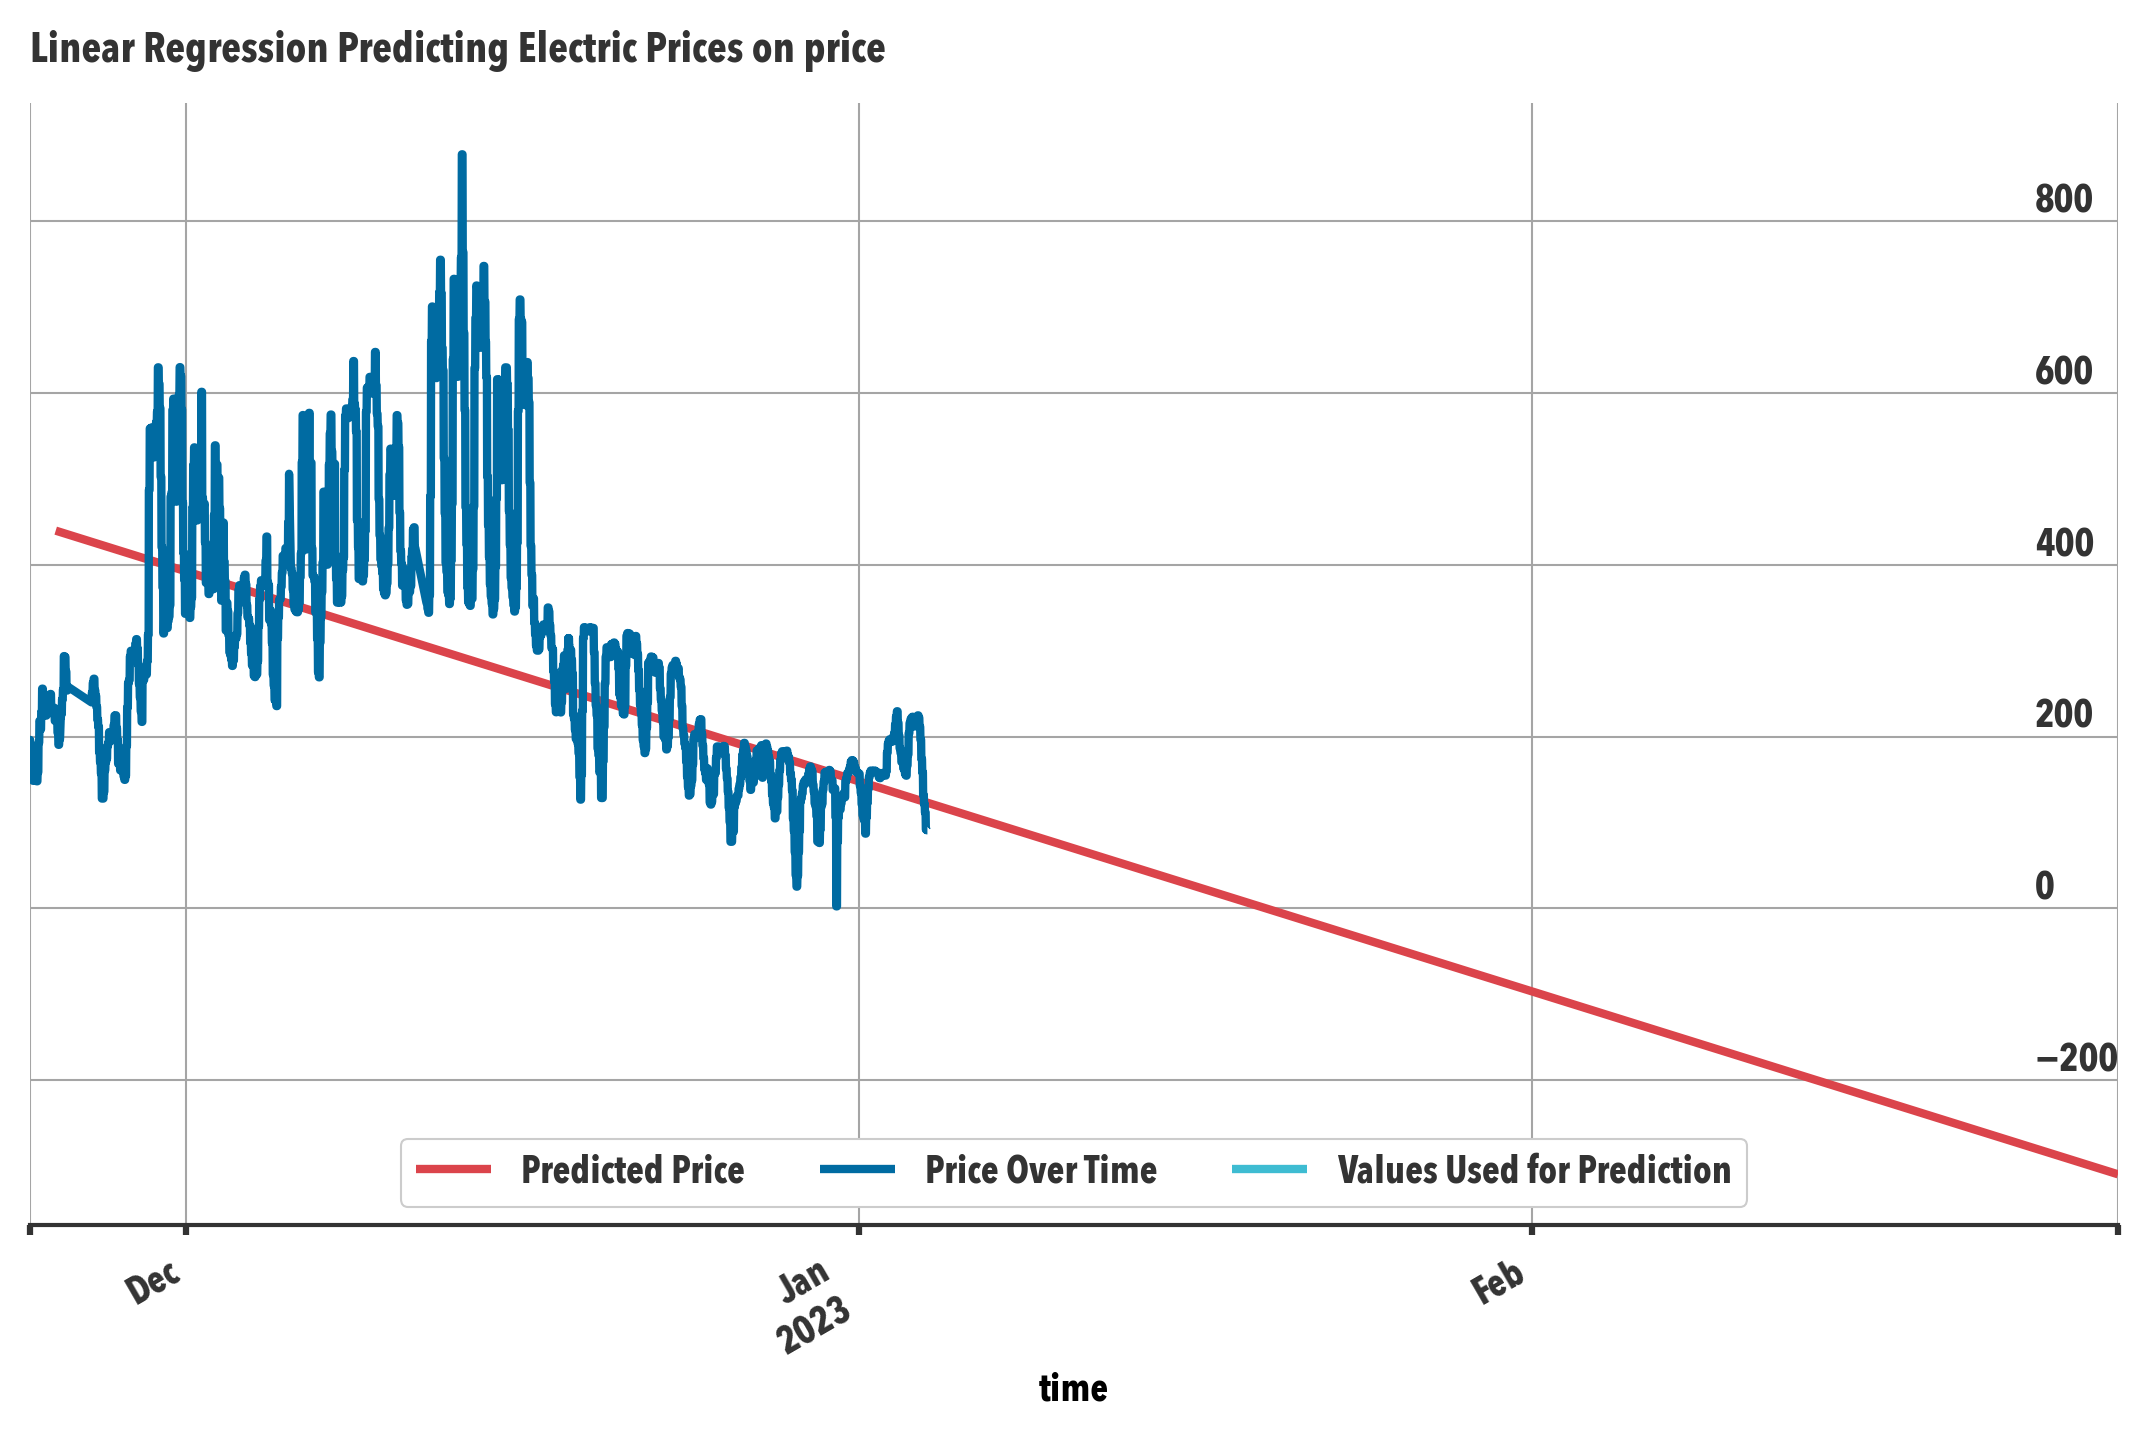

In [10]:
fig, ax = plt.subplots(1, 1, sharex=True)
pred_df.set_index("time")["pred_price"].plot(ax=ax, label="Predicted Price")
df.set_index("time")[FIT_DATA].plot(ax=ax, label="Price Over Time")
df_to_fit.set_index("time")[FIT_DATA].plot(ax=ax, label="Values Used for Prediction")
ax.set_title(f"Linear Regression Predicting Electric Prices on {FIT_DATA}")

# ax.text(
#     pred_df["time"].max() - pd.DateOffset(days=30),
#     df["price"].mean(),
#     "Obviously electric prices\naren't well suited for prediction\nby linear regression at\nshorter timeperiods.",
#     bbox={"boxstyle": "round", "facecolor": "salmon"},
# )
plt.legend(loc="lower center", ncols=3)
plt.show()